In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.cross_validation import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import OneHotEncoder
import copy
from typing import List
%matplotlib inline
import matplotlib.pyplot as plt 

def plot_result(target, predict, title):
    x = range(len(predict))
    
    area = np.pi * (1)**2  # 0 to 15 point radii
    plt.scatter(x, predict, color = 'red', s=area, label='prediction')
    plt.scatter(x, target, color = 'blue', s=area, label='True Value')
    plt.title('Work Flow '+ title +" fitted values against true values")
    plt.legend()
    plt.show()
    
    plt.scatter(x, predict, color = 'red',s=area, label='prediction')
    plt.scatter(x, target - predict, color = 'blue', s=area, label='Residuals')
    plt.title('Work Flow '+ title +" residuals versus fitted values")
    plt.legend()
    plt.show()

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import copy
import scipy as sp
Data = pd.read_csv("network_backup_dataset.csv")
labels = Data.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v

def convert_OneDimension(label, data):
    
    if label == labels[1]:
        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        for day, number in zip(days, range(len(days))):
            data = data.replace({'Day of Week': {day : number}})
        return data
    
    elif label == labels[3]:
        work_flow_ids = ['work_flow_0', 'work_flow_1','work_flow_2','work_flow_3', 'work_flow_4']
        for work_flow, number in zip(work_flow_ids, range(len(work_flow_ids))):
            data = data.replace({'Work-Flow-ID' : {work_flow : number}})
        return data
    
    elif label == labels[4]:
        uniqueFiles = ['File_{0}'.format(s) for s in range(len((pd.unique(Data['File Name']))))]
        for file_name, number in zip(uniqueFiles,range(len(uniqueFiles))):
            data = data.replace({'File Name' : {file_name : number}})
        return data      
    else:
        return data

for i in range(len(labels)):
    Data = convert_OneDimension(labels[i], Data)

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


In [6]:
train_data = copy.deepcopy(Data)
train_data.drop(labels[6],1,inplace = True)
df = pd.DataFrame(train_data)
grouped = df.groupby(['Work-Flow-ID'])


Work Flow 0
Train RMSE:  0.0358355207799
Test RMSE  0.0358869702489


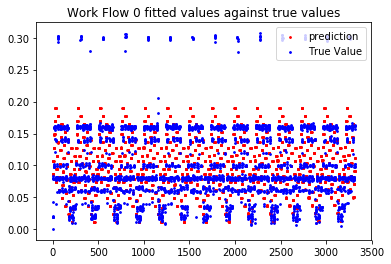

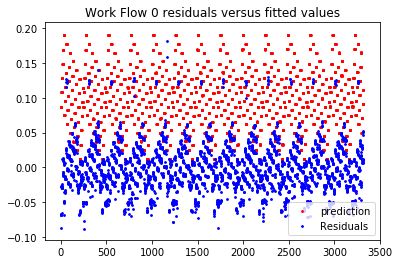

Work Flow 1
Train RMSE:  0.148766030563
Test RMSE  0.148918602014


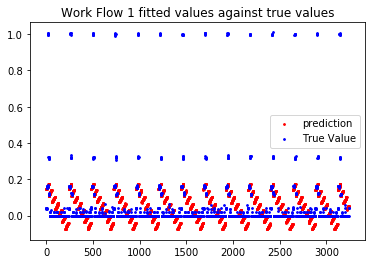

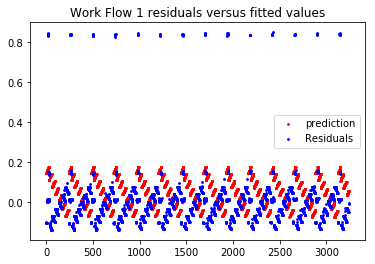

Work Flow 2
Train RMSE:  0.0429093206391
Test RMSE  0.0430669058479


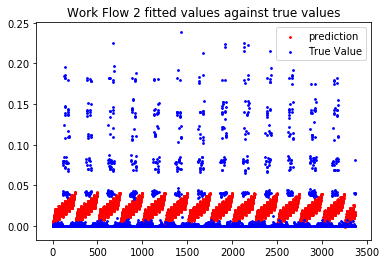

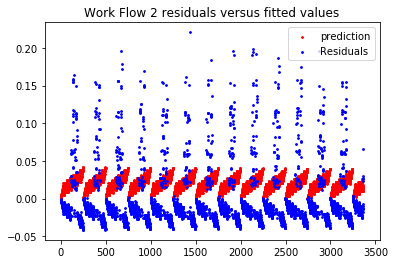

Work Flow 3
Train RMSE:  0.00724387887388
Test RMSE  0.0072608942421


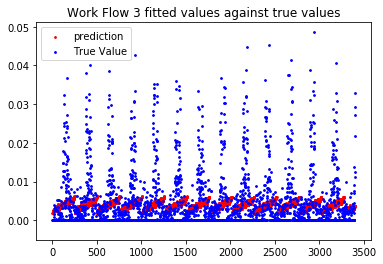

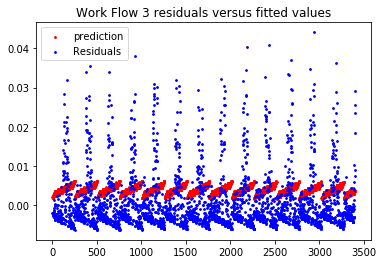

Work Flow 4
Train RMSE:  0.0859219367933
Test RMSE  0.0859906141157


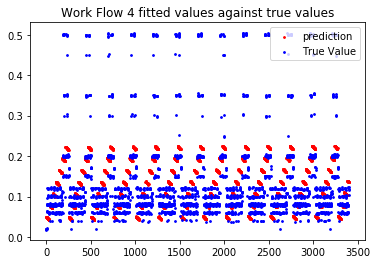

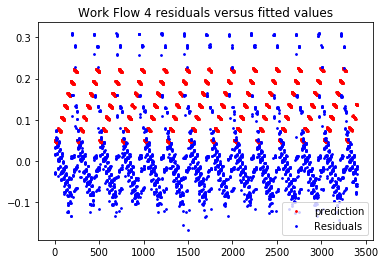

In [9]:
test_rmse_list = []
train_rmse_list = []
for work_flow_data in grouped:
    work_flow_number = list(work_flow_data)[0]
    work_flow = list(work_flow_data)[1]   
    work_flow_train = np.asarray(work_flow)
    
    work_flow_array = work_flow_train[:, :5]
    target_data = work_flow_train[:, 5]
    
    kf = KFold(n_splits=10)
    LinReg = LinearRegression()
    train_mse_list = []
    test_mse_list = []
    for train_index, test_index in kf.split(work_flow_array):
        train_sample = work_flow_array[train_index, :]
        train_target = target_data[train_index]
        test_sample = work_flow_array[test_index, :]
        test_target = target_data[test_index]
        
        LinReg.fit(train_sample, train_target)
        
        train_predicted = LinReg.predict(train_sample)
        train_mse = mean_squared_error(train_target, train_predicted)
        train_mse_list.append(train_mse)
        
        test_predicted = LinReg.predict(test_sample)
        test_mse = mean_squared_error(test_target, test_predicted)
        test_mse_list.append(test_mse)
        
    train_rmse = np.sqrt(np.mean(train_mse_list))
    test_rmse = np.sqrt(np.mean(test_mse_list))
    
    print 'Work Flow ' + str(work_flow_number)
    print 'Train RMSE: ', train_rmse
    print 'Test RMSE ', test_rmse
    title = str(work_flow_number)
    plot_result(train_target, train_predicted, title)